### Integrace obyčejných diferenciálních rovnic
#### Eulerova metoda a její stabilita

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Vyřešte diferenciální rovnici
$$y' = \alpha y$$
Eulerovou metodou pro $x\in [0, 6]$, $y(0) = 1$, $\alpha=-1$. Použijte různé velikosti kroku $\Delta x = 0.1, 1, 2, 2.5$. Analytické řešení konverguje k nule. Platí to i pro numerické řešení?

In [3]:
def euler(f, y0, x0, xmax, dx, args=()):
    nstep = int(np.ceil((xmax-x0)/dx))
    x = np.arange(nstep+1)*dx + x0
    y = np.zeros((nstep+1, len(y0)), dtype=np.complex128 if np.iscomplexobj(y0) else np.float64)
    
    y[0, :] = y0
    for i in range(nstep):
        y[i+1,:] = y[i,:] + dx*f(x[i], y[i,:], *args)
    return x, y

In [4]:
def f(x, y, alpha=-1):
    return alpha*y

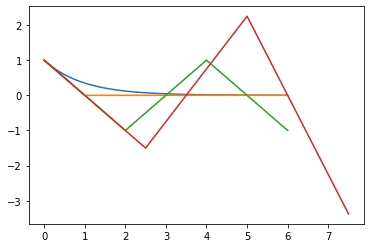

In [5]:
for dx in [0.1, 1, 2, 2.5]:
    x, y = euler(f, y0=[1], x0=0, xmax=6, dx=dx)
    plt.plot(x, y)

### Bonusová úloha:
Analytické řešení konverguje k nule pokud $\Re(\alpha) < 0$. Pokud použijeme velikost integračního kroku $\Delta x=1$, pro jaké hodnoty komplexního parametru $\alpha$ konverguje Eulerova metoda? Vyřešte předchozí úlohu pro reálné a imaginární hodnoty $\alpha$ v intervalu $\Re(\alpha)\in[-2.2, 2.2]$, $\Im(\alpha)\in[-2.2, 2.2]$ a vykreslete hodnotu v posledním integračním bodě do 2D barevné mapy.

In [6]:
sampl_im = 80
sampl_re = 80

ylast = np.zeros((sampl_im, sampl_re), dtype=np.complex128)
alpha_im = np.linspace(-2.2, 2.2, sampl_im)
alpha_re = np.linspace(-2.2, 2.2, sampl_re)
for i_re in range(sampl_re):
    for i_im in range(sampl_im):
        alpha = alpha_re[i_re] + alpha_im[i_im]*1j
        x, y = euler(f, y0=[1+0j], x0=0, xmax=40, dx=1, args=(alpha,))
        ylast[i_im, i_re] = y[-1]

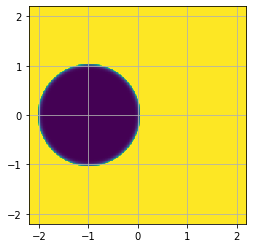

In [7]:
plt.imshow(np.abs(ylast[::-1, :]), vmin=0, vmax=10, extent=(-2.2, 2.2, -2.2, 2.2), aspect="equal")
plt.gca().set_yticks([-2, -1, 0, 1, 2])
plt.grid()

### Chemická kinetika
Mějme chemické reakce iontů
$$\rm NH^+ + H_2 \xrightarrow{r_1} NH_2^+ + H$$
$$\rm NH_2^+ + H_2 \xrightarrow{r_1} NH_3^+ + H$$
Koncentrace iontů jsou popsány rovnicemi
$$
\frac{\rm d[NH^+]}{{\rm d}t} = -r_1[{\rm NH^+}]
$$
$$
\frac{\rm d[NH_2^+]}{{\rm d}t} = -r_2[{\rm NH_2^+}] + r_1[{\rm NH^+}]
$$
$$
\frac{\rm d[NH_3^+]}{{\rm d}t} = r_2[{\rm NH_2^+}]
$$
Řekněme, že $r_1 = 200\,\rm s^{-1}$  a $r_2 = 100\,\rm s^{-1}$. Vypočtěte vývoj koncentrací iontů, pokud počáteční hodnota $\rm [NH_2^+]$ je $10^3\,\rm cm^{-3}$.

Poznámka: pravou stranu můžeme také zapsat jako
$$
\frac{\rm d}{{\rm d}t}
\left(\begin{matrix}{}
           {\rm [NH^+]}\\\
           {\rm [NH_2^+]}\\\
           {\rm [NH_3^+]}
    \end{matrix}\right) =
\left(\begin{matrix}{}
           -r_1 & 0    & 0\\\
            r_1 & -r_2 & 0\\\
              0 &  r_2 & 0
    \end{matrix}\right)\cdot
    \left(\begin{matrix}{}
           {\rm [NH^+]}\\\
           {\rm [NH_2^+]}\\\
           {\rm [NH_3^+]}
    \end{matrix}\right)
    $$

In [8]:
def f(x, y, r):
    return np.array([
        -y[0]*r[0],
        y[0]*r[0] - y[1]*r[1],
        y[1]*r[1]
    ])

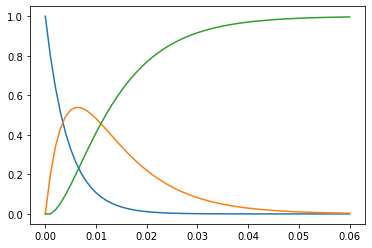

In [9]:
r = [200, 100]
N0 = [1, 0, 0]
t, y = euler(f, N0, 0, 0.06, 0.001, args=(r,))
plt.plot(t, y);

#### Příklad: tuhé (stiff) soustavy
Mějme soustavu popsanou rovnicí
$$
\frac{{\rm d} A_1}{{\rm d}t} = -r_1 A_1 + r_2 A_2
$$
$$
\frac{{\rm d} A_2}{{\rm d}t} = +r_1 A_1 - r_2 A_2 - r_3 A_2
$$
$$
\frac{{\rm d} B}{{\rm d}t} = +r_3 A_2
$$
nebo
$$
\frac{\rm d}{{\rm d}t}
\left(\begin{matrix}{}
           {\rm A_1}\\\
           {\rm A_2}\\\
           {\rm B}
    \end{matrix}\right) =
\left(\begin{matrix}{}
           -r_1 &  r_2 & 0\\\
            r_1 & -r_2-r_3 & 0\\\
              0 &  r_3 & 0
    \end{matrix}\right)\cdot
    \left(\begin{matrix}{}
           {\rm A_1}\\\
           {\rm A_2}\\\
           {\rm B}
    \end{matrix}\right)
    $$
kde $r_1\approx r_2 \gg r_3$. Procesy $r_1$ a $r_2$ mohou odpovídat například rychlé relaxaci vnitřních stavů molekuly $A$. Např $r_1 = r_2 = 20000; r_3 = 100$.

In [10]:
def fmatrix(x, y, rmatrix):
    return rmatrix @ y

def fjac(x, y, rmatrix):
    return rmatrix

In [11]:
y0 = [1, 0, 0]
r = [20000, 20000, 100.]
rmatrix = np.array([
    [-r[0],  r[1],      0],
    [ r[0], -r[1]-r[2], 0],
    [ 0,     r[2],      0]
])

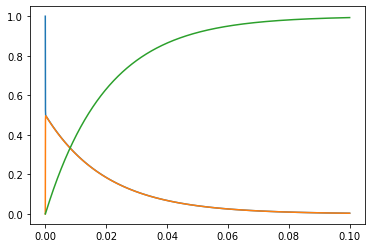

In [13]:
t, y = euler(fmatrix, y0, 0, 0.1, 0.00001, args=(rmatrix,))
plt.plot(t, y);

In [15]:
def euler_implicit(f, fjac, y0, x0, xmax, dx, args=(), cplx=False):
    from numpy.linalg import inv
    nstep = int(np.ceil((xmax-x0)/dx))
    x = np.arange(nstep+1)*dx + x0
    y = np.zeros((nstep+1, len(y0)), dtype=np.complex128 if np.iscomplexobj(y0) else np.float64)
    
    y[0, :] = y0
    unit = np.eye(len(y0))
    for i in range(nstep):
        y[i+1,:] = y[i,:] + dx*inv(unit - dx*fjac(x[i], y[i,:], *args)) @ f(x[i], y[i,:], *args)
    return x, y

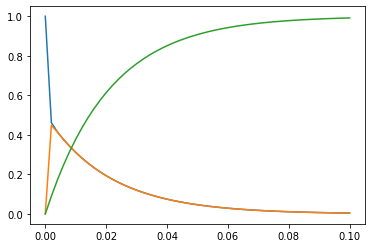

In [16]:
t, y = euler_implicit(fmatrix, fjac, y0, 0, 0.1, 0.002, args=(rmatrix,))
plt.plot(t, y);